In [10]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

income = pd.read_csv("data/us_income.csv")
income.head()

,id,county,pop_over_25,median_income,median_income_no_hs,median_income_hs,median_income_some_college,median_income_college,median_income_graduate_degree
0,1001,"Autauga County, Alabama",35696,34581,17946,30157,33225,53248,68125
1,1003,"Baldwin County, Alabama",130063,31352,17474,25242,30922,46017,55933
2,1005,"Barbour County, Alabama",18988,25182,20692,21325,24090,41888,50245
3,1007,"Bibb County, Alabama",15340,27638,22274,28980,22387,30284,42236
4,1009,"Blount County, Alabama",38846,32808,24870,27541,34660,48681,53664


In [11]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 9 columns):
id                               3143 non-null int64
county                           3143 non-null object
pop_over_25                      3143 non-null int64
median_income                    3143 non-null int64
median_income_no_hs              3143 non-null int64
median_income_hs                 3143 non-null int64
median_income_some_college       3143 non-null int64
median_income_college            3143 non-null int64
median_income_graduate_degree    3143 non-null int64
dtypes: int64(8), object(1)
memory usage: 221.1+ KB


In [30]:
def select_random_sample(count):
    random_indices = random.sample(range(0, income.shape[0]), count)
    return income.iloc[random_indices]

random.seed(1)

samples = [select_random_sample(100) for _ in range(1000)]
samples[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 550 to 1610
Data columns (total 9 columns):
id                               100 non-null int64
county                           100 non-null object
pop_over_25                      100 non-null int64
median_income                    100 non-null int64
median_income_no_hs              100 non-null int64
median_income_hs                 100 non-null int64
median_income_some_college       100 non-null int64
median_income_college            100 non-null int64
median_income_graduate_degree    100 non-null int64
dtypes: int64(8), object(1)
memory usage: 7.8+ KB


In [22]:
ratios = [x["median_income_hs"] / x["median_income_college"] for x in samples]

In [25]:
mean_ratios = [np.mean(x) for x in ratios]
mean_ratios[:10]

[0.6617618960443947,
 0.6618460825551545,
 0.6226856895546148,
 0.6307432283889965,
 0.6439381958117878,
 0.6734061585086245,
 0.6369823637664075,
 0.6572341528540158,
 0.6546860987473702,
 0.6429906496300875]

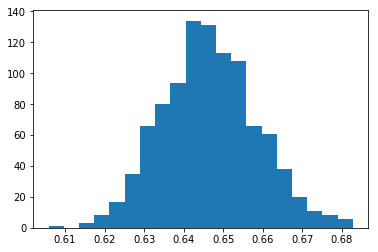

In [29]:
plt.hist(mean_ratios,20)
plt.show()

In [37]:
len([r for r in mean_ratios if r >= .675]) / len(mean_ratios)

0.014

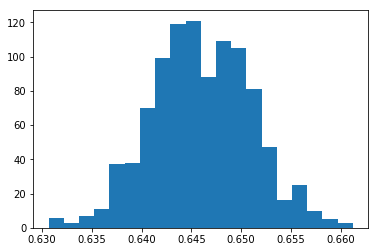

In [39]:
# This is "steeper" than the graph from before, because it has 500 items in each sample.
random.seed(1)
mean_ratios = []

for i in range(1000):
    sample = select_random_sample(500)
    ratios = sample["median_income_hs"] / sample["median_income_college"]
    mean_ratios.append(ratios.mean())
    
plt.hist(mean_ratios, 20);